# Introduction to Pandas

Pandas is a package built on top of numpy which incorporates many additional features which make it more convenient for data analysis. One main addition is the inclusion of row and column labels, which make pandas function much like spreadsheet software. It also includes tools for much more complex computations than regular numpy allows

In [1]:
import pandas as pd
import numpy as np
# by default, pandas only shows the beginning and end of a large dataframe
# You can choose how many rows and columns to show.
# If you want to see all of the rows, set the respective value to None
pd.options.display.max_rows = 100 
pd.options.display.max_columns = 50

## Importing data
There are a lot of built-in functions for importing data to pandas, for example, from files, database, and web sources. For a full list of the supported methods, see [the documentation on pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

In this example, we're going to load data formatted as a csv from a website URL. In particular, it is a direct link to a file hosted in our course github repository.

The data we're loading is a simplified pokedex which includes the number, name, base stats, types, abilities, and colors of each pokemon. We'll be using this data to explore the functionality of pandas. 

The primary class of pandas is the DataFrame, which functions like a spreadsheet (like in excel). It allows for named rows and columns. Data types between two different columns can vary, but entries within the same column should have the same type. 

In [2]:
# URL for data hosted online
pokedex_url = 'https://raw.githubusercontent.com/bwsi-remote-sensing-2023/01-Intro-to-python/master/pokedex.csv' 
pokedex_df = pd.read_csv(pokedex_url, index_col='Index') # create a dataframe from a csv, set the column titled "Index" as the row labels

In [3]:
pokedex_df = pd.read_csv('pokedex.csv')
print(pokedex_df)


     Index     Pokemon   HP  Atk  Def  SpAtk  SpDef  Speed  Total    Type I  \
0      1.0   Bulbasaur   45   49   49     65     65     45    318     Grass   
1      2.0     Ivysaur   60   62   63     80     80     60    405     Grass   
2      3.0    Venusaur   80   82   83    100    100     80    525     Grass   
3      4.0  Charmander   39   52   43     60     50     65    309      Fire   
4      5.0  Charmeleon   58   64   58     80     65     80    405      Fire   
..     ...         ...  ...  ...  ...    ...    ...    ...    ...       ...   
815  798.0     Kartana   59  181  131     59     31    109    570     Grass   
816  799.0    Guzzlord  223  101   53     97     53     43    570      Dark   
817  800.0    Necrozma   97  107  101    127     89     79    600   Psychic   
818  801.0    Magearna   80   95  115    130    115     65    600     Steel   
819  802.0   Marshadow   90  125   80     90     90    125    600  Fighting   

    Type II    Ability I Ability II Hidden Ability 

In [4]:
# in our case, the cloned repository includes the pokedex file in the folder, 
# so we could equivalently use the filename instead of a URL
pokedex_df = pd.read_csv('pokedex.csv', index_col='Index')

In [5]:
# We'll do some cleanup to deal with empty values
pokedex_df = pokedex_df.fillna('') # fill in the NaN values with empty string 
pokedex_df # prints out the dataframe

,Pokemon,HP,Atk,Def,SpAtk,SpDef,Speed,Total,Type I,Type II,Ability I,Ability II,Hidden Ability,Color
Index,,,,,,,,,,,,,,
1.0,Bulbasaur,45,49,49,65,65,45,318,Grass,Poison,Overgrow,,Chlorophyll,Green
2.0,Ivysaur,60,62,63,80,80,60,405,Grass,Poison,Overgrow,,Chlorophyll,Green
3.0,Venusaur,80,82,83,100,100,80,525,Grass,Poison,Overgrow,,Chlorophyll,Green
4.0,Charmander,39,52,43,60,50,65,309,Fire,,Blaze,,Solar Power,Red
5.0,Charmeleon,58,64,58,80,65,80,405,Fire,,Blaze,,Solar Power,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798.0,Kartana,59,181,131,59,31,109,570,Grass,Steel,Beast Boost,,,White
799.0,Guzzlord,223,101,53,97,53,43,570,Dark,Dragon,Beast Boost,,,Black
800.0,Necrozma,97,107,101,127,89,79,600,Psychic,,Prism Armor,,,Black


## Indexing
Like numpy, you can index a dataframe to select elements or subsets of entries. There are a number of ways to index pandas dataframes. The two following methods are recommended:
`.loc[]` and `.iloc[]`

In [6]:
pokedex_df.head(5)


,Pokemon,HP,Atk,Def,SpAtk,SpDef,Speed,Total,Type I,Type II,Ability I,Ability II,Hidden Ability,Color
Index,,,,,,,,,,,,,,
1.0,Bulbasaur,45,49,49,65,65,45,318,Grass,Poison,Overgrow,,Chlorophyll,Green
2.0,Ivysaur,60,62,63,80,80,60,405,Grass,Poison,Overgrow,,Chlorophyll,Green
3.0,Venusaur,80,82,83,100,100,80,525,Grass,Poison,Overgrow,,Chlorophyll,Green
4.0,Charmander,39,52,43,60,50,65,309,Fire,,Blaze,,Solar Power,Red
5.0,Charmeleon,58,64,58,80,65,80,405,Fire,,Blaze,,Solar Power,Red


### .loc[ ] name-based indexing
The first way, using `.loc[a,b]` indexes based on the __values__ of the row index and column names. This allows us to get entries where the row index value equals `a` and the column name equals `b`.

In [7]:
# Get the entry for index value 745.1 - Lycanroc (midnight)
pokedex_df.loc[745.1]

Pokemon           Lycanroc (midnight)
HP                                 85
Atk                               115
Def                                75
SpAtk                              55
SpDef                              75
Speed                              82
Total                             487
Type I                           Rock
Type II                              
Ability I                    Keen Eye
Ability II              Vital Spirit 
Hidden Ability               No Guard
Color                           Brown
Name: 745.1, dtype: object

In [8]:
# You can get specific column values for a single entry
pokedex_df.loc[250,['Pokemon','Type I','Type II']]

Pokemon    Swinub
Type I        Ice
Type II    Ground
Name: 250.0, dtype: object

In [9]:
# you can use the : notation to slice multiple rows and columns
pokedex_df.loc[690:700,'Pokemon':'Total']

,Pokemon,HP,Atk,Def,SpAtk,SpDef,Speed,Total
Index,,,,,,,,
690.0,Skrelp,50,60,60,60,60,30,320
691.0,Dragalge,65,75,90,97,123,44,494
692.0,Clauncher,50,53,62,58,63,44,330
693.0,Clawitzer,71,73,88,120,89,59,500
694.0,Helioptile,44,38,33,61,43,70,289
695.0,Heliolisk,62,55,52,109,94,109,481
696.0,Tyrunt,58,89,77,45,45,48,362
697.0,Tyrantrum,82,121,119,69,59,71,521
698.0,Amaura,77,59,50,67,63,46,362


In [10]:
# Similarly to numpy, you can use the : notation without indices on a side to mean "from beginning" or "to end"
pokedex_df.loc[:10,"Ability I":]

,Ability I,Ability II,Hidden Ability,Color
Index,,,,
1.0,Overgrow,,Chlorophyll,Green
2.0,Overgrow,,Chlorophyll,Green
3.0,Overgrow,,Chlorophyll,Green
4.0,Blaze,,Solar Power,Red
5.0,Blaze,,Solar Power,Red
6.0,Blaze,,Solar Power,Red
7.0,Torrent,,Rain Dish,Blue
8.0,Torrent,,Rain Dish,Blue
9.0,Torrent,,Rain Dish,Blue


In [11]:
# and : by itself gives all of the entries in that dimension
pokedex_df.loc[:,'Pokemon'].head(10) #just return top 10 entries

Index
1.0      Bulbasaur
2.0        Ivysaur
3.0       Venusaur
4.0     Charmander
5.0     Charmeleon
6.0      Charizard
7.0       Squirtle
8.0      Wartortle
9.0      Blastoise
10.0      Caterpie
Name: Pokemon, dtype: object

### .iloc[ ] integer indexing

The second way, using `.iloc[i,j]` uses the numpy-style integer indices to get a value. In this case, iloc takes integer values from 0 to the number of entries in that dimension. 

Like numpy, `.iloc[i,j]` gives the entry at the $i^{th}$ row and $j^{th}$ column.

In [12]:
pokedex_df.iloc[100] # gets 101st row (recall python counts from 0)

Pokemon            Electrode
HP                        60
Atk                       50
Def                       70
SpAtk                     80
SpDef                     80
Speed                    140
Total                    480
Type I              Electric
Type II                     
Ability I         Soundproof
Ability II            Static
Hidden Ability     Aftermath
Color                    Red
Name: 110.0, dtype: object

In [13]:
# The : style indexing also works for iloc
pokedex_df.iloc[25:30, 0:8]

,Pokemon,HP,Atk,Def,SpAtk,SpDef,Speed,Total
Index,,,,,,,,
27.0,Raichu,60,90,55,90,80,100,475
28.0,Sandshrew,50,75,85,20,30,40,300
29.0,Sandslash,75,100,110,45,55,65,450
30.0,Nidoran♀,55,47,52,40,40,41,275
31.0,Nidorina,70,62,67,55,55,56,365


## Changing index column
You can change the index column of the dataframe with `.set_index()` or reset it to default numerical indexing with `.reset_index()`.

Note however, that these operations create a __copy__ of the original dataframe, and do not change the dataframe "in place" (i.e. doesn't change the original object)

In [14]:
# reset index to be default numerical index
reindexed_pokedex = pokedex_df.reset_index()
reindexed_pokedex.head()

,Index,Pokemon,HP,Atk,Def,SpAtk,SpDef,Speed,Total,Type I,Type II,Ability I,Ability II,Hidden Ability,Color
0,1.0,Bulbasaur,45,49,49,65,65,45,318,Grass,Poison,Overgrow,,Chlorophyll,Green
1,2.0,Ivysaur,60,62,63,80,80,60,405,Grass,Poison,Overgrow,,Chlorophyll,Green
2,3.0,Venusaur,80,82,83,100,100,80,525,Grass,Poison,Overgrow,,Chlorophyll,Green
3,4.0,Charmander,39,52,43,60,50,65,309,Fire,,Blaze,,Solar Power,Red
4,5.0,Charmeleon,58,64,58,80,65,80,405,Fire,,Blaze,,Solar Power,Red


In [15]:
# Change the index to the Pokemon name column
pokedex_indexed_by_name = pokedex_df.reset_index().set_index('Pokemon')
pokedex_indexed_by_name

,Index,HP,Atk,Def,SpAtk,SpDef,Speed,Total,Type I,Type II,Ability I,Ability II,Hidden Ability,Color
Pokemon,,,,,,,,,,,,,,
Bulbasaur,1.0,45,49,49,65,65,45,318,Grass,Poison,Overgrow,,Chlorophyll,Green
Ivysaur,2.0,60,62,63,80,80,60,405,Grass,Poison,Overgrow,,Chlorophyll,Green
Venusaur,3.0,80,82,83,100,100,80,525,Grass,Poison,Overgrow,,Chlorophyll,Green
Charmander,4.0,39,52,43,60,50,65,309,Fire,,Blaze,,Solar Power,Red
Charmeleon,5.0,58,64,58,80,65,80,405,Fire,,Blaze,,Solar Power,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kartana,798.0,59,181,131,59,31,109,570,Grass,Steel,Beast Boost,,,White
Guzzlord,799.0,223,101,53,97,53,43,570,Dark,Dragon,Beast Boost,,,Black
Necrozma,800.0,97,107,101,127,89,79,600,Psychic,,Prism Armor,,,Black


In [16]:
# note that the original dataframe was not affected
pokedex_df

,Pokemon,HP,Atk,Def,SpAtk,SpDef,Speed,Total,Type I,Type II,Ability I,Ability II,Hidden Ability,Color
Index,,,,,,,,,,,,,,
1.0,Bulbasaur,45,49,49,65,65,45,318,Grass,Poison,Overgrow,,Chlorophyll,Green
2.0,Ivysaur,60,62,63,80,80,60,405,Grass,Poison,Overgrow,,Chlorophyll,Green
3.0,Venusaur,80,82,83,100,100,80,525,Grass,Poison,Overgrow,,Chlorophyll,Green
4.0,Charmander,39,52,43,60,50,65,309,Fire,,Blaze,,Solar Power,Red
5.0,Charmeleon,58,64,58,80,65,80,405,Fire,,Blaze,,Solar Power,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798.0,Kartana,59,181,131,59,31,109,570,Grass,Steel,Beast Boost,,,White
799.0,Guzzlord,223,101,53,97,53,43,570,Dark,Dragon,Beast Boost,,,Black
800.0,Necrozma,97,107,101,127,89,79,600,Psychic,,Prism Armor,,,Black


## Logical indexing
You can test conditionals on a column, for example, testing if the value of the column is greater than a value. What's returned is a boolean column of the same size, with a value of `True` wherever it is true, and `False` otherwise. (This can similarly be done in numpy).



In [17]:
pokedex_df['Total'] > 520

Index
1.0      False
2.0      False
3.0       True
4.0      False
5.0      False
         ...  
798.0     True
799.0     True
800.0     True
801.0     True
802.0     True
Name: Total, Length: 820, dtype: bool

If you take that boolean column and use it to index the dataframe, you can get all of the entries that satisfy that condition.

In [18]:
pokedex_df.loc[pokedex_df['Total']>=520] # all of the pokemon with total base stats greater than 500

,Pokemon,HP,Atk,Def,SpAtk,SpDef,Speed,Total,Type I,Type II,Ability I,Ability II,Hidden Ability,Color
Index,,,,,,,,,,,,,,
3.0,Venusaur,80,82,83,100,100,80,525,Grass,Poison,Overgrow,,Chlorophyll,Green
6.0,Charizard,78,84,78,109,85,100,534,Fire,Flying,Blaze,,Solar Power,Red
9.0,Blastoise,79,83,100,85,105,78,530,Water,,Torrent,,Rain Dish,Blue
64.0,Arcanine,90,110,80,100,80,95,555,Fire,,Intimidate,Flash Fire,Justified,Brown
99.0,Cloyster,50,90,180,85,45,70,520,Water,Ice,Shell Armor,Skill Link,Overcoat,Purple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798.0,Kartana,59,181,131,59,31,109,570,Grass,Steel,Beast Boost,,,White
799.0,Guzzlord,223,101,53,97,53,43,570,Dark,Dragon,Beast Boost,,,Black
800.0,Necrozma,97,107,101,127,89,79,600,Psychic,,Prism Armor,,,Black


In [19]:
# Get all of the pokemon of a given color
pokedex_df.loc[pokedex_df['Color']=='Black']

,Pokemon,HP,Atk,Def,SpAtk,SpDef,Speed,Total,Type I,Type II,Ability I,Ability II,Hidden Ability,Color
Index,,,,,,,,,,,,,,
174.0,Snorlax,160,110,65,65,110,30,540,Normal,,Immunity,Thick Fat,Gluttony,Black
162.0,Umbreon,95,65,110,60,130,65,525,Dark,,Synchronize,,Inner Focus,Black
226.0,Murkrow,60,85,42,85,42,91,405,Dark,Flying,Insomnia,Super Luck,Prankster,Black
230.0,Unown,48,72,48,72,48,48,336,Psychic,,Levitate,,,Black
244.0,Sneasel,55,95,55,35,75,115,430,Dark,Ice,Inner Focus,Keen Eye,Pickpocket,Black
260.0,Houndour,45,60,30,80,50,65,330,Dark,Fire,Early Bird,Flash Fire,Unnerve,Black
261.0,Houndoom,75,90,50,110,80,95,500,Dark,Fire,Early Bird,Flash Fire,Unnerve,Black
328.0,Mawile,50,85,85,55,55,50,380,Steel,Fairy,Hyper Cutter,Intimidate,Sheer Force,Black
352.0,Spoink,60,25,35,70,80,60,330,Psychic,,Thick Fat,Own Tempo,Gluttony,Black


### Compound boolean queries
You can use boolean operations (OR, AND, NOT) to combine conditions

We will look for pokemon with specific types to demonstrate compound queries

### OR queries
In the following example, we query for all pokemon who have at least part "Dragon" typing.

The vertical line | represents the element-wise "OR" operation. "OR" operations require either or both statements on either side of the operation to be true.

Thus, the below query 

```query = (pokedex_df['Type I']=='Dragon') | (pokedex_df['Type II']=='Dragon')```

asks, for each row, if 'Type I' is equal to "Dragon" OR 'Type II' is equal to "Dragon"

In [20]:
query = (pokedex_df['Type I']=='Dragon') | (pokedex_df['Type II']=='Dragon')
pokedex_df.loc[query] # Get all of the entries corresponding to the above query

,Pokemon,HP,Atk,Def,SpAtk,SpDef,Speed,Total,Type I,Type II,Ability I,Ability II,Hidden Ability,Color
Index,,,,,,,,,,,,,,
178.0,Dratini,41,64,45,50,50,50,300,Dragon,,Shed Skin,,Marvel Scale,Blue
179.0,Dragonair,61,84,65,70,70,70,420,Dragon,,Shed Skin,,Marvel Scale,Blue
180.0,Dragonite,91,134,95,100,100,80,600,Dragon,Flying,Inner Focus,,Multiscale,Brown
134.0,Kingdra,75,95,95,95,95,85,540,Water,Dragon,Swift Swim,Sniper,Damp,Blue
356.0,Vibrava,50,70,50,50,50,70,340,Ground,Dragon,Levitate,,,Green
357.0,Flygon,80,100,80,80,80,100,520,Ground,Dragon,Levitate,,,Green
361.0,Altaria,75,70,90,70,105,80,490,Dragon,Flying,Natural Cure,,Cloud Nine,Blue
400.0,Bagon,45,75,60,40,30,50,300,Dragon,,Rock Head,,Sheer Force,Blue
401.0,Shelgon,65,95,100,60,50,50,420,Dragon,,Rock Head,,Overcoat,White


In [21]:
(pokedex_df['Type I']=='Dragon').all()

False

### AND queries
The ampersand `&` character represents the element-wise boolean operation "AND". In order for an "AND" statement to be true, both conditions on either side of the operation must be true.

We can combine boolean operations to construct complex queries: for example, getting all pokemon who are both Dragon and Flying types. The query below looks for pokemon who are EITHER (Primary Type "Flying" AND Secondary Type "Dragon") OR (Primary Type "Dragon" AND Secondary Type "Flying")

Note that parentheses should be used to group operations so that the order of operations is clear

In [22]:
# you can use the backslash operator \ to continue code on the next line
query = ((pokedex_df['Type I']=='Flying') & (pokedex_df['Type II']=='Dragon'))\
        | ((pokedex_df['Type I']=='Dragon') & (pokedex_df['Type II']=='Flying'))
pokedex_df.loc[query]

,Pokemon,HP,Atk,Def,SpAtk,SpDef,Speed,Total,Type I,Type II,Ability I,Ability II,Hidden Ability,Color
Index,,,,,,,,,,,,,,
180.0,Dragonite,91,134,95,100,100,80,600,Dragon,Flying,Inner Focus,,Multiscale,Brown
361.0,Altaria,75,70,90,70,105,80,490,Dragon,Flying,Natural Cure,,Cloud Nine,Blue
402.0,Salamence,95,135,80,110,80,100,600,Dragon,Flying,Intimidate,,Moxie,Blue
413.0,Rayquaza,105,150,90,150,90,95,680,Dragon,Flying,Air Lock,,,Green
714.0,Noibat,40,30,35,45,40,55,245,Flying,Dragon,Frisk,Infiltrator,Telepathy,Purple
715.0,Noivern,85,70,80,97,80,123,535,Flying,Dragon,Frisk,Infiltrator,Telepathy,Purple


### NOT queries
There are two ways to do negation. Consider the following query for selecting all pokemon who are Fire type, but not Flying

```
query = ((pokedex_df['Type I']=='Fire') & ~(pokedex_df['Type II']=='Flying'))\
        | ((pokedex_df['Type I']!='Flying') & (pokedex_df['Type II']=='Fire'))
```

The first way to do negation is with the tilde ~ symbol, which negates the subsequent boolean statement:
We use this in `~(pokedex_df['Type II']=='Flying')`.
The parentheses determine order of operations. First we find all entries where their secondary type is "Flying"
Then the tilde in front negates that statement, flipping all True values to False, and vice versa

The second way to do negation is using the != notation, which represents "not equal to"
We use this in `(pokedex_df['Type I']!='Flying')`
This finds all entries where their primary type is not equal to "Flying"

In [23]:
query = ((pokedex_df['Type I']=='Fire') & ~(pokedex_df['Type II']=='Flying'))\
        | ((pokedex_df['Type I']!='Flying') & (pokedex_df['Type II']=='Fire'))

pokedex_df.loc[query]


,Pokemon,HP,Atk,Def,SpAtk,SpDef,Speed,Total,Type I,Type II,Ability I,Ability II,Hidden Ability,Color
Index,,,,,,,,,,,,,,
4.0,Charmander,39,52,43,60,50,65,309,Fire,,Blaze,,Solar Power,Red
5.0,Charmeleon,58,64,58,80,65,80,405,Fire,,Blaze,,Solar Power,Red
39.0,Vulpix,38,41,40,50,65,65,299,Fire,,Flash Fire,,Drought,Brown
40.0,Ninetales,73,76,75,81,100,100,505,Fire,,Flash Fire,,Drought,Yellow
63.0,Growlithe,55,70,45,70,50,60,350,Fire,,Intimidate,Flash Fire,Justified,Brown
64.0,Arcanine,90,110,80,100,80,95,555,Fire,,Intimidate,Flash Fire,Justified,Brown
83.0,Ponyta,50,85,55,65,65,90,410,Fire,,Run Away,Flash Fire,Flame Body,Yellow
84.0,Rapidash,65,100,70,80,80,105,500,Fire,,Run Away,Flash Fire,Flame Body,Yellow
149.0,Magmar,65,95,57,100,85,93,495,Fire,,Flame Body,,Vital Spirit,Red


## Sorting
Dataframes can be sorted by value

In [24]:
pokedex_df.sort_values('Pokemon', ascending=False) # Sort by name descending

,Pokemon,HP,Atk,Def,SpAtk,SpDef,Speed,Total,Type I,Type II,Ability I,Ability II,Hidden Ability,Color
Index,,,,,,,,,,,,,,
718.0,Zygarde,108,100,121,81,95,95,600,Dragon,Ground,Aura Break,,,Green
634.0,Zweilous,72,85,70,65,70,58,420,Dark,Dragon,Hustle,,,Blue
44.0,Zubat,40,45,35,30,40,55,245,Poison,Flying,Inner Focus,,Infiltrator,Purple
570.0,Zorua,40,65,40,80,40,65,330,Dark,,Illusion,,,Gray
571.0,Zoroark,60,105,60,120,60,105,510,Dark,,Illusion,,,Gray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681.0,Aegislash,60,50,150,50,150,60,520,Steel,Ghost,Stance Change,,,Brown
617.0,Accelgor,80,70,40,100,60,145,495,Bug,,Hydration,Sticky Hold,Unburden,Red
388.0,Absol,65,130,60,75,60,75,465,Dark,,Pressure,Super Luck,Justified,White


In [25]:
# You can sort by multiple columns
pokedex_df.sort_values(['Type I','Type II', 'Total'], ascending=False) # Sort by type combination, then stats descending

,Pokemon,HP,Atk,Def,SpAtk,SpDef,Speed,Total,Type I,Type II,Ability I,Ability II,Hidden Ability,Color
Index,,,,,,,,,,,,,,
424.0,Empoleon,84,86,88,111,101,60,530,Water,Steel,Torrent,,Defiant,Blue
565.0,Carracosta,74,108,133,83,65,32,495,Water,Rock,Solid Rock,Sturdy,Swift Swim,Blue
398.0,Relicanth,100,90,130,45,65,55,485,Water,Rock,Swift Swim,Rock Head,Sturdy,Gray
253.0,Corsola,55,55,85,65,85,35,380,Water,Rock,Hustle,Natural Cure,Regenerator,Pink
564.0,Tirtouga,54,78,103,53,45,22,355,Water,Rock,Solid Rock,Sturdy,Swift Swim,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292.0,Cascoon,50,35,55,25,25,15,205,Bug,,Shed Skin,,,Purple
664.0,Scatterbug,38,35,40,27,25,35,200,Bug,,Shield Dust,Compound Eyes,Friend Guard,Black
10.0,Caterpie,45,30,35,20,20,45,195,Bug,,Shield Dust,,Run Away,Green


## Adding columns, rows, and changing values
You can add another column like:
```
dataframe['NewColumnName'] = value
```
`value` can be a single value, an array of the same size as the index of `dataframe`, a pandas `Series`, or a dictionary mapping `index: value` for entries in the dataframe index

In [26]:
pokedex_df['Nickname'] = None
pokedex_df

,Pokemon,HP,Atk,Def,SpAtk,SpDef,Speed,Total,Type I,Type II,Ability I,Ability II,Hidden Ability,Color,Nickname
Index,,,,,,,,,,,,,,,
1.0,Bulbasaur,45,49,49,65,65,45,318,Grass,Poison,Overgrow,,Chlorophyll,Green,None
2.0,Ivysaur,60,62,63,80,80,60,405,Grass,Poison,Overgrow,,Chlorophyll,Green,None
3.0,Venusaur,80,82,83,100,100,80,525,Grass,Poison,Overgrow,,Chlorophyll,Green,None
4.0,Charmander,39,52,43,60,50,65,309,Fire,,Blaze,,Solar Power,Red,None
5.0,Charmeleon,58,64,58,80,65,80,405,Fire,,Blaze,,Solar Power,Red,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798.0,Kartana,59,181,131,59,31,109,570,Grass,Steel,Beast Boost,,,White,None
799.0,Guzzlord,223,101,53,97,53,43,570,Dark,Dragon,Beast Boost,,,Black,None
800.0,Necrozma,97,107,101,127,89,79,600,Psychic,,Prism Armor,,,Black,None


In [27]:
# you can change the value of an entry using indexing and assignment =
pokedex_df.loc[4,'Nickname'] = 'Abby' # indexing using .loc[] pokedex entry 4, 'Nickname column'
pokedex_df.iloc[113,-1] = 'Terry' # indexing using .iloc[] 113rd row, last column
pokedex_df.iloc[[3,113],:] 

,Pokemon,HP,Atk,Def,SpAtk,SpDef,Speed,Total,Type I,Type II,Ability I,Ability II,Hidden Ability,Color,Nickname
Index,,,,,,,,,,,,,,,
4.0,Charmander,39,52,43,60,50,65,309,Fire,,Blaze,,Solar Power,Red,Abby
129.0,Tangela,65,55,115,100,40,60,435,Grass,,Chlorophyll,Leaf Guard,Regenerator,Blue,Terry


## Combining Dataframes
### Appending

Some of you may have noticed that the pokedex file only includes Generations 1-7 of pokemon. Let's add the pokemon from Gen 8. The file `pokedex_gen8.csv` contains the pokedex entries for all of the pokemon that show up in the 8th generation of games (Sword/Shield).

In [28]:
# you can add another dataframe on to the end using append()
gen8_pokedex_df = pd.read_csv('pokedex_gen8.csv') # create a dataframe with new entries 


In [29]:
appended_pokedex_df = pd.concat([pokedex_df, gen8_pokedex_df], ignore_index=True, sort=False) # the sort=False keyword prevents the columns from being reordered alphabetically
appended_pokedex_df = appended_pokedex_df.fillna('').drop_duplicates() # some cleanup operations, replace NaN with emptry strings, and drop duplicate rows
appended_pokedex_df

,Pokemon,HP,Atk,Def,SpAtk,SpDef,Speed,Total,Type I,Type II,Ability I,Ability II,Hidden Ability,Color,Nickname,Galar Pokedex Number,Weight_kg,Height_m,Weight_lbs,Height_ft,Cap_Rate,Egg_Steps,Classification
0,Bulbasaur,45,49,49,65,65,45,318.0,Grass,Poison,Overgrow,,Chlorophyll,Green,,,,,,,,,
1,Ivysaur,60,62,63,80,80,60,405.0,Grass,Poison,Overgrow,,Chlorophyll,Green,,,,,,,,,
2,Venusaur,80,82,83,100,100,80,525.0,Grass,Poison,Overgrow,,Chlorophyll,Green,,,,,,,,,
3,Charmander,39,52,43,60,50,65,309.0,Fire,,Blaze,,Solar Power,Red,Abby,,,,,,,,
4,Charmeleon,58,64,58,80,65,80,405.0,Fire,,Blaze,,Solar Power,Red,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,Drakloak,68,80,50,60,50,102,,dragon,ghost,Clear Body,Infiltrator,Cursed Body,,,396.0,11.0,1.4,24.3,4.583,45.0,10240.0,Caretaker Pokémon
1216,Dragapult,88,120,75,100,75,142,,dragon,ghost,Clear Body,Infiltrator,Cursed Body,,,397.0,50.0,3.0,110.2,9.833,45.0,10240.0,Stealth Pokémon
1217,Zacian,92,130,115,80,115,138,,fairy,,Intrepid Sword,,,,,398.0,110.0,2.8,242.5,9.167,10.0,30720.0,Warrior Pokémon
1218,Zamazenta,92,130,115,80,115,138,,fighting,,Dauntless Shield,,,,,399.0,210.0,2.9,463.0,9.5,10.0,30720.0,Warrior Pokémon


However, you may notice that some pokemon show up twice in the combined dataframe, and since the entries in `gen8_pokedex_df` includes different columns, `remove_duplicates` does not see those entries as duplicates.

To remedy this, we can index both dataframes by the name of the pokemon and use the [`combine_first`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.combine_first.html#pandas.DataFrame.combine_first) function to fill in the null values of one dataframe with the corresponding values in the other.

In [30]:
gen8_pokedex_indexed_by_name = gen8_pokedex_df.reset_index().set_index('Pokemon')
combined_pokedex_df = pokedex_indexed_by_name.combine_first(gen8_pokedex_indexed_by_name)
combined_pokedex_df

,Ability I,Ability II,Atk,Cap_Rate,Classification,Color,Def,Egg_Steps,Galar Pokedex Number,HP,Height_ft,Height_m,Hidden Ability,Index,SpAtk,SpDef,Speed,Total,Type I,Type II,Weight_kg,Weight_lbs,index
Pokemon,,,,,,,,,,,,,,,,,,,,,,,
Abomasnow,Snow Warning,,92,60.0,Frosted Tree Pokémon,White,75,5120.0,97.0,90,7.250,2.2,Soundproof,478.0,92,85,60,494.0,Ice,Grass,135.5,298.7,96.0
Abra,Synchronize,Inner Focus,20,NaN,NaN,Brown,15,NaN,NaN,25,NaN,NaN,Magic Guard,69.0,105,55,90,310.0,Psychic,,NaN,NaN,NaN
Absol,Pressure,Super Luck,130,NaN,NaN,White,60,NaN,NaN,65,NaN,NaN,Justified,388.0,75,60,75,465.0,Dark,,NaN,NaN,NaN
Accelgor,Hydration,Sticky Hold,70,75.0,Shell Out Pokémon,Red,40,3840.0,276.0,80,2.583,0.8,Unburden,617.0,100,60,145,495.0,Bug,,25.3,55.8,275.0
Aegislash,Stance Change,,50,45.0,Royal Sword Pokémon,Brown,150,5120.0,332.0,60,5.583,1.7,,681.0,50,150,60,520.0,Steel,Ghost,53.0,116.8,331.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoroark,Illusion,,105,NaN,NaN,Gray,60,NaN,NaN,60,NaN,NaN,,571.0,120,60,105,510.0,Dark,,NaN,NaN,NaN
Zorua,Illusion,,65,NaN,NaN,Gray,40,NaN,NaN,40,NaN,NaN,,570.0,80,40,65,330.0,Dark,,NaN,NaN,NaN
Zubat,Inner Focus,,45,NaN,NaN,Purple,35,NaN,NaN,40,NaN,NaN,Infiltrator,44.0,30,40,55,245.0,Poison,Flying,NaN,NaN,NaN


### Merges and Joins
A more advanced way to join dataframes is using the `merge` or `join` operations.

For those who have worked with SQL-style databases before, you may be familiar with `merge` and `join` operations. They are done to combine two tables or dataframes which share values in certain columns. This allows us to look up entries in another dataframe using the values of our current dataframe.

In this example, we will use `merge` to get the stats for a team of pokemon. This dataframe will just contain the names and nicknames of the pokemon that we want on our team. After we perform a merge, we will get a dataframe with the respective statistics for the pokemon we've chosen.


In [31]:
# feel free to replace the names of pokemon with ones you want on your team
team_df = pd.DataFrame({'my pokemon':['Bulbasaur','Squirtle','Charmander'],
                       'nickname':['leafygurl','h2woah','toaster']})
team_df

,my pokemon,nickname
0,Bulbasaur,leafygurl
1,Squirtle,h2woah
2,Charmander,toaster


There are four merge/join types in `pandas`:
- (INNER) JOIN: Returns records that have matching values in both tables
- (LEFT) JOIN: Returns all records from the left table, and the matched records from the right table 
- (RIGHT) JOIN: Returns all records from the right table, and the matched records from the left table   
- (OUTER) JOIN: Returns all records when there is a match in either left or right table
    

 ![inner join illustration, venn diagram with intersection colored in, from w3schools sql lesson](https://www.w3schools.com/sql/img_innerjoin.gif)
  ![left join illustration, venn diagram with full left circle colored in, from w3schools sql lesson](https://www.w3schools.com/sql/img_leftjoin.gif)
  ![right join illustration, venn diagram with full right circle colored in, from w3schools sql lesson](https://www.w3schools.com/sql/img_rightjoin.gif)
  ![outer join illustration, venn diagram with union of two circles colored in, from w3schools sql lesson](https://www.w3schools.com/sql/img_fulljoin.gif)

The information that we need in order to perform a merge is:
- what dataframes to merge
- what kind of merge/join (inner/left/right/outer)
- what columns to merge on in each dataframe

Knowing this, let's look at the function signature of merge for a dataframe

In [32]:
# you can use the question mark symbol ? to examine the function signature
pokedex_df.merge?

Signature:
pokedex_df.merge(
    right: 'DataFrame | Series',
    how: 'MergeHow' = 'inner',
    on: 'IndexLabel | None' = None,
    left_on: 'IndexLabel | None' = None,
    right_on: 'IndexLabel | None' = None,
    left_index: 'bool' = False,
    right_index: 'bool' = False,
    sort: 'bool' = False,
    suffixes: 'Suffixes' = ('_x', '_y'),
    copy: 'bool | None' = None,
    indicator: 'str | bool' = False,
    validate: 'MergeValidate | None' = None,
) -> 'DataFrame'
Docstring:
Merge DataFrame or named Series objects with a database-style join.

A named Series object is treated as a DataFrame with a single named column.

The join is done on columns or indexes. If joining columns on
columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
on indexes or indexes on a column or columns, the index will be passed on.
When performing a cross merge, no column specifications to merge on are
allowed.

.. warning::

    If both key columns contain rows where the key is a 

The answers to the following questions to get the team dataframe with stats are:

**what dataframes to merge?**
`team_df` and `combined_pokedex_df`
    
**what kind of merge/join (inner/left/right/outer)?**
inner or left 
    
**what columns to merge on in each dataframe**
for `team_df`, the column is `my pokemon`, for `combined_pokedex_df`, it is the index.


In [33]:
team_with_stats = team_df.merge(combined_pokedex_df, how='inner',
                               left_on='my pokemon', right_index=True)
team_with_stats

,my pokemon,nickname,Ability I,Ability II,Atk,Cap_Rate,Classification,Color,Def,Egg_Steps,Galar Pokedex Number,HP,Height_ft,Height_m,Hidden Ability,Index,SpAtk,SpDef,Speed,Total,Type I,Type II,Weight_kg,Weight_lbs,index
0,Bulbasaur,leafygurl,Overgrow,,49,NaN,NaN,Green,49,NaN,NaN,45,NaN,NaN,Chlorophyll,1.0,65,65,45,318.0,Grass,Poison,NaN,NaN,NaN
1,Squirtle,h2woah,Torrent,,48,NaN,NaN,Blue,65,NaN,NaN,44,NaN,NaN,Rain Dish,7.0,60,54,43,314.0,Water,,NaN,NaN,NaN
2,Charmander,toaster,Blaze,,52,45.0,Lizard Pokémon,Red,43,5120.0,378.0,39,2.0,0.6,Solar Power,4.0,60,50,65,309.0,Fire,,8.5,18.7,377.0


In [34]:
# we can select specific columns from the dataframe
team_with_stats.loc[:,['my pokemon','nickname','Total']]

,my pokemon,nickname,Total
0,Bulbasaur,leafygurl,318.0
1,Squirtle,h2woah,314.0
2,Charmander,toaster,309.0


### Exercise
Put together a team of pokemon by editing `team_df` and performing a `merge`. Remember that you can only have 6 pokemon on a team at once.

In [35]:
team_df.loc[0, 'my pokemon'] = 'Ivysaur'
team_df.loc[0, 'nickname'] = 'ivy'
team_df.loc[1, 'nickname'] = 'venu'

ultimate_team = team_df.merge(combined_pokedex_df, how= 'left',
                              left_on = 'my pokemon', right_index = True)

ultimate_team

,my pokemon,nickname,Ability I,Ability II,Atk,Cap_Rate,Classification,Color,Def,Egg_Steps,Galar Pokedex Number,HP,Height_ft,Height_m,Hidden Ability,Index,SpAtk,SpDef,Speed,Total,Type I,Type II,Weight_kg,Weight_lbs,index
0,Ivysaur,ivy,Overgrow,,62,NaN,NaN,Green,63,NaN,NaN,60,NaN,NaN,Chlorophyll,2.0,80,80,60,405.0,Grass,Poison,NaN,NaN,NaN
1,Squirtle,venu,Torrent,,48,NaN,NaN,Blue,65,NaN,NaN,44,NaN,NaN,Rain Dish,7.0,60,54,43,314.0,Water,,NaN,NaN,NaN
2,Charmander,toaster,Blaze,,52,45.0,Lizard Pokémon,Red,43,5120.0,378.0,39,2.0,0.6,Solar Power,4.0,60,50,65,309.0,Fire,,8.5,18.7,377.0


## Calculations and operations
There are various ways to do math to the dataframes

### Column operations
You can perform basic math element-wise between columns, such as addition, subtraction, multiplication, and division.

Note that the `gen8_pokedex_df` does not contain a `Total` stats column, so currently the gen8 pokemon have `NaN` in that column. We can fix that, because `Total` is generated as the sum of the respective `HP` `Atk` `Def` `SpAtk` `SpDef` and `Speed`. We can add the entire columns at once, without having to loop over each entry. Pandas supports vectorized operations behind the scenes.

In [36]:
# these are the entries missing 'Total' stats
combined_pokedex_df.loc[combined_pokedex_df['Total'].isnull()] 

,Ability I,Ability II,Atk,Cap_Rate,Classification,Color,Def,Egg_Steps,Galar Pokedex Number,HP,Height_ft,Height_m,Hidden Ability,Index,SpAtk,SpDef,Speed,Total,Type I,Type II,Weight_kg,Weight_lbs,index
Pokemon,,,,,,,,,,,,,,,,,,,,,,,
Alcremie,Sweet Veil,NaN,60,100.0,Cream Pokémon,NaN,75,5120.0,186.0,65,1.000,0.3,Aroma Veil,NaN,110,121,64,NaN,fairy,NaN,0.5,1.1,185.0
Appletun,Ripen,Gluttony,85,45.0,Apple Nectar Pokémon,NaN,80,5120.0,207.0,110,1.333,0.4,Thick Fat,NaN,100,80,30,NaN,grass,dragon,13.0,28.7,206.0
Applin,Ripen,Gluttony,40,255.0,Apple Core Pokémon,NaN,80,5120.0,205.0,40,0.667,0.2,Bulletproof,NaN,40,40,20,NaN,grass,dragon,0.5,1.1,204.0
Arctovish,Water Absorb,Ice Body,90,45.0,Fossil Pokémon,NaN,100,8960.0,377.0,90,6.583,2.0,Slush Rush,NaN,80,90,55,NaN,water,ice,175.0,385.8,376.0
Arctozolt,Volt Absorb,Static,100,45.0,Fossil Pokémon,NaN,90,8960.0,375.0,90,7.583,2.3,Slush Rush,NaN,90,80,55,NaN,electric,ice,150.0,330.7,374.0
Arrokuda,Swift Swim,NaN,63,255.0,Rush Pokémon,NaN,40,5120.0,180.0,41,1.667,0.5,Propeller Tail,NaN,40,30,66,NaN,water,NaN,1.0,2.2,179.0
Barraskewda,Swift Swim,NaN,123,60.0,Skewer Pokémon,NaN,60,5120.0,181.0,61,4.250,1.3,Propeller Tail,NaN,60,50,136,NaN,water,NaN,30.0,66.1,180.0
Blipbug,Swarm,Compoundeyes,20,255.0,Larva Pokémon,NaN,20,3840.0,10.0,25,1.333,0.4,Telepathy,NaN,25,45,45,NaN,bug,NaN,8.0,17.6,9.0
Boltund,Strong Jaw,NaN,90,45.0,Dog Pokémon,NaN,60,5120.0,47.0,69,3.250,1.0,Competitive,NaN,90,60,121,NaN,electric,NaN,34.0,75.0,46.0


In [37]:
combined_pokedex_df['Total'] = combined_pokedex_df['HP']\
                               + combined_pokedex_df['Atk']\
                               + combined_pokedex_df['Def']\
                               + combined_pokedex_df['SpAtk']\
                               + combined_pokedex_df['SpDef']\
                               + combined_pokedex_df['Speed']

In [38]:
pokedex_df['Total']/ pokedex_df['HP'] # computes the ratio between total stats and HP

Index
1.0      7.066667
2.0      6.750000
3.0      6.562500
4.0      7.923077
5.0      6.982759
           ...   
798.0    9.661017
799.0    2.556054
800.0    6.185567
801.0    7.500000
802.0    6.666667
Length: 820, dtype: float64

### Universal functions
Universal functions can operate on entire dataframes or slices of dataframes. They return a dataframe copy with the same index as the original dataframe. Numpy universal functions can be applied to any numeric dataframe or slice.

In [39]:
np.log(pokedex_df.loc[:,'HP':'Total'].astype(float)) # take natural log of all stats
# again, these functions operate on each element independently, and return a dataframe with the same index and size of input

,HP,Atk,Def,SpAtk,SpDef,Speed,Total
Index,,,,,,,
1.0,3.806662,3.891820,3.891820,4.174387,4.174387,3.806662,5.762051
2.0,4.094345,4.127134,4.143135,4.382027,4.382027,4.094345,6.003887
3.0,4.382027,4.406719,4.418841,4.605170,4.605170,4.382027,6.263398
4.0,3.663562,3.951244,3.761200,4.094345,3.912023,4.174387,5.733341
5.0,4.060443,4.158883,4.060443,4.382027,4.174387,4.382027,6.003887
...,...,...,...,...,...,...,...
798.0,4.077537,5.198497,4.875197,4.077537,3.433987,4.691348,6.345636
799.0,5.407172,4.615121,3.970292,4.574711,3.970292,3.761200,6.345636
800.0,4.574711,4.672829,4.615121,4.844187,4.488636,4.369448,6.396930


### .apply()
You can apply an arbitrary function to each row or column using the `.apply()` function.

If you pass the name of a function (e.g. np.mean, or the name of any function you've written), you can apply it to either each column, or each row using `.apply()`

In [40]:
pokedex_df.loc[:,'Atk':'Speed'].apply(np.mean) # applies the function np.mean() to each column

Atk      76.115854
Def      71.919512
SpAtk    69.957317
SpDef    70.370732
Speed    66.140244
dtype: float64

In [41]:
pokedex_df.loc[:,'Atk':'Speed'].apply(np.mean, axis=1) # if you wanted to apply it to each row instead, use the argument axis=1

Index
1.0       54.6
2.0       69.0
3.0       89.0
4.0       54.0
5.0       69.4
         ...  
798.0    102.2
799.0     69.4
800.0    100.6
801.0    104.0
802.0    102.0
Length: 820, dtype: float64

The above example is actually a bit unnecessary. There are several built-in functions in dataframes, including a `.mean()` which has the same functionality.

In [42]:
pokedex_df.loc[:,'Atk':'Speed'].mean()

Atk      76.115854
Def      71.919512
SpAtk    69.957317
SpDef    70.370732
Speed    66.140244
dtype: float64

In [43]:
pokedex_df.loc[:,'Atk':'Speed'].mean(axis=1) #applies per row

Index
1.0       54.6
2.0       69.0
3.0       89.0
4.0       54.0
5.0       69.4
         ...  
798.0    102.2
799.0     69.4
800.0    100.6
801.0    104.0
802.0    102.0
Length: 820, dtype: float64

Most [descriptive statistics](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats) (median, mode, standard deviation, count, quantile, etc) have built-in functions. Where `.apply()` really shines, however, is for applying custom functions. 

To show that functionality, let's take a sidebar and talk about lambda functions.

#### Lambda functions
Sometimes you want to define a function, but you don't want to write the whole function declaration setup 
```
def functionname(inputs):
  ...
  return outputs
```

In those situations, you can write lambda (also known as anonymous) functions. The syntax for a lambda function is:

```
functionname = lambda x: operations_on_x
```

For example, if you wanted to write a function that squares the input, you could write:

In [44]:
square_it = lambda x: x**2 # recall that ** is exponentiation in python, this function returns the square of the input
for num in range(10):
  print(square_it(num))

0
1
4
9
16
25
36
49
64
81


This is especially useful if some function takes another function as an argument, like panda's `.apply()`

The typical usage of `.apply()` is:

`dataframe_obj.apply(functionname)`, which calls `functionname` on each column of `dataframe_obj`

However, you can replace `functionname` with a lambda function. In this example, we use the following lambda function:

```lambda col: [np.min(col), np.max(col)]```

The word `col` represents the argument, and then to the right of the colon, we return a list with two elements: the minimum and maximum values of the column


In [45]:
stats_ranges = pokedex_df.loc[:,'HP':'Total'].apply(lambda col: [np.min(col), np.max(col)])
print(stats_ranges)

    HP  Atk  Def  SpAtk  SpDef  Speed  Total
0    1    5    5     10     20      5    175
1  255  181  230    180    230    180    720


the above can be expanded into a dataframe:

In [46]:
pokedex_df.loc[:,'HP':'Total'].apply(lambda col: [np.min(col), np.mean(col), np.max(col)], result_type='expand')
# each respective row corresponds to the function applied to the column

,HP,Atk,Def,SpAtk,SpDef,Speed,Total
0,1.00000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000
1,68.60122,76.115854,71.919512,69.957317,70.370732,66.140244,423.104878
2,255.00000,181.000000,230.000000,180.000000,230.000000,180.000000,720.000000


In [47]:
# we can rename the rows to make it more interpretable. Also note the backslash \
# character allows a command to continue onto the next line, ignoring whitespace
pokedex_df.loc[:,'HP':'Total']\
          .apply(lambda col: [np.min(col), np.mean(col), np.max(col)], result_type='expand')\
          .rename({0:'min', 1:'mean', 2:'max'})

,HP,Atk,Def,SpAtk,SpDef,Speed,Total
min,1.00000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000
mean,68.60122,76.115854,71.919512,69.957317,70.370732,66.140244,423.104878
max,255.00000,181.000000,230.000000,180.000000,230.000000,180.000000,720.000000


### Groupby
Dataframes can be grouped by column values, and operations can be applied to each group

In [48]:
# counts the number of pokemon of each type combination
pokedex_df.groupby(['Type I','Type II'])['Total'].count()

Type I  Type II 
Bug                 18
        Electric     4
        Fairy        2
        Fighting     3
        Fire         2
                    ..
Water   Ice          3
        Poison       3
        Psychic      5
        Rock         4
        Steel        1
Name: Total, Length: 163, dtype: int64

In [49]:
# gets the range of stats for each type combination
pokedex_df.groupby(['Type I','Type II'])['Total'].apply(lambda col: [np.min(col), np.max(col)])

Type I  Type II 
Bug                 [194, 500]
        Electric    [319, 500]
        Fairy       [304, 464]
        Fighting    [500, 570]
        Fire        [360, 550]
                       ...    
Water   Ice         [475, 535]
        Poison      [335, 515]
        Psychic     [315, 520]
        Rock        [355, 495]
        Steel       [530, 530]
Name: Total, Length: 163, dtype: object

# Multi-level indexing
In this section, we'll cover some more advanced topics in pandas, including 
*   Multi-indexing
*   Pivot tables

We'll be introducing some more data to play with, based on state populations over time


In [50]:
state_populations_url = 'https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv'
state_abbrevs_url = 'https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv'
state_areas_url = 'https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv'

state_areas = pd.read_csv(state_areas_url, index_col='state')
state_areas.head() # just print top 5 rows

,area (sq. mi)
state,
Alabama,52423
Alaska,656425
Arizona,114006
Arkansas,53182
California,163707


In [51]:
state_abbrevs = pd.read_csv(state_abbrevs_url)
state_abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [52]:
state_populations = pd.read_csv(state_populations_url) 
state_populations.head(10) #print first 10 rows

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0
5,AL,total,2011,4801627.0
6,AL,total,2009,4757938.0
7,AL,under18,2009,1134192.0
8,AL,under18,2013,1111481.0
9,AL,total,2013,4833722.0


In [53]:
state_populations.tail()

,state/region,ages,year,population
2539,USA,total,2010,309326295.0
2540,USA,under18,2011,73902222.0
2541,USA,total,2011,311582564.0
2542,USA,under18,2012,73708179.0
2543,USA,total,2012,313873685.0


Note that the state populations are just listed by abbreviations. It may be useful to include the state names as a column in a table. We have this information in the `state_abbrevs` table. We'd like to merge it with the population data.

The function `pd.merge()` merges two dataframes using set logic. 

In [54]:
merged = pd.merge(state_populations, state_abbrevs, how='outer',
                 left_on='state/region', right_on='abbreviation')
# The arguments left_on and right_on specify what columns to join on. It looks for matching values in each dataframe
# and fills in the additional columns of the merged dataframe based on the matching data
# The 'how' argument specifies what kind of join. Outer means keep all entries even if one does not show up in the other
# conversely, 'inner' discards rows where a corresponding entry does not exist in the other
merged

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL
...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,NaN,NaN
2540,USA,under18,2011,73902222.0,NaN,NaN
2541,USA,total,2011,311582564.0,NaN,NaN
2542,USA,under18,2012,73708179.0,NaN,NaN


In [55]:
# we can also drop the unnecessary extra abbreviation column now
merged = merged.drop('abbreviation', axis=1) #drop from columns
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [56]:
# we can check if there were any missing values
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [57]:
# let's see where the issue is. What entries are missing population entries?
merged.loc[merged['population'].isnull()]

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN
2453,PR,under18,1993,NaN,NaN
2454,PR,under18,1992,NaN,NaN
2455,PR,total,1992,NaN,NaN
2456,PR,under18,1994,NaN,NaN
2457,PR,total,1994,NaN,NaN


In [58]:
# what about where there's no state entry?
merged.loc[merged['state'].isnull(), 'state/region']

2448     PR
2449     PR
2450     PR
2451     PR
2452     PR
2453     PR
2454     PR
2455     PR
2456     PR
2457     PR
2458     PR
2459     PR
2460     PR
2461     PR
2462     PR
2463     PR
2464     PR
2465     PR
2466     PR
2467     PR
2468     PR
2469     PR
2470     PR
2471     PR
2472     PR
2473     PR
2474     PR
2475     PR
2476     PR
2477     PR
2478     PR
2479     PR
2480     PR
2481     PR
2482     PR
2483     PR
2484     PR
2485     PR
2486     PR
2487     PR
2488     PR
2489     PR
2490     PR
2491     PR
2492     PR
2493     PR
2494     PR
2495     PR
2496    USA
2497    USA
2498    USA
2499    USA
2500    USA
2501    USA
2502    USA
2503    USA
2504    USA
2505    USA
2506    USA
2507    USA
2508    USA
2509    USA
2510    USA
2511    USA
2512    USA
2513    USA
2514    USA
2515    USA
2516    USA
2517    USA
2518    USA
2519    USA
2520    USA
2521    USA
2522    USA
2523    USA
2524    USA
2525    USA
2526    USA
2527    USA
2528    USA
2529    USA
2530    USA
2531

In [59]:
# more concicely, we can use .unique() to only see the unique values
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [60]:
# We can fix this easily
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [61]:
# now let's combine the data with the area data
final = pd.merge(merged, state_areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [62]:
# we can use the .query() syntax to search for specific data
data2010 = final.query("year == 2010 & ages == 'total'") # specify column name 
data2010.set_index('state', inplace=True) # equivalent to data2010 = data2010.set_index('state')
data2010.head()

,state/region,ages,year,population,area (sq. mi)
state,,,,,
Alabama,AL,total,2010,4785570.0,52423.0
Alaska,AK,total,2010,713868.0,656425.0
Arizona,AZ,total,2010,6408790.0,114006.0
Arkansas,AR,total,2010,2922280.0,53182.0
California,CA,total,2010,37333601.0,163707.0


In [63]:
# Let's compute the density of each state and then sort by density
density = data2010['population'] / data2010['area (sq. mi)']
density.sort_values(ascending=False, inplace=True)
density

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
Massachusetts            621.815538
Maryland                 466.445797
Delaware                 460.445752
New York                 356.094135
Florida                  286.597129
Pennsylvania             275.966651
Ohio                     257.549634
California               228.051342
Illinois                 221.687472
Virginia                 187.622273
Indiana                  178.197831
North Carolina           177.617157
Georgia                  163.409902
Tennessee                150.825298
South Carolina           144.854594
New Hampshire            140.799273
Hawaii                   124.746707
Kentucky                 107.586994
Michigan                 102.015794
Washington                94.557817
Texas                     93.987655
Alabama                   91.287603
Louisiana             

In [64]:
density.tail()

state
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
United States         NaN
dtype: float64

### Exercises
Compute the total population of the entire united states, as well as its population density for each year.

Sort the states by population density.

What year saw the biggest change in population for the US as a whole?

Which states had the biggest percentage change in population in that year?

In [65]:
final

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0
...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,United States,NaN
2540,USA,under18,2011,73902222.0,United States,NaN
2541,USA,total,2011,311582564.0,United States,NaN
2542,USA,under18,2012,73708179.0,United States,NaN


In [66]:
# Select only the rows where ages is 'total'

total_population_df = final.query("ages == 'total'")

# Group by year and sum the population
total_population = total_population_df.groupby('year')['population'].sum()
print(total_population)

# Compute the total area of the United States
total_area = state_areas['area (sq. mi)'].sum()

# Compute population density for each year
population_density = total_population / total_area
print(population_density)


year
1990    499245628.0
1991    505961884.0
1992    513028462.0
1993    519837190.0
1994    526251652.0
1995    532556806.0
1996    538788582.0
1997    545293864.0
1998    551708232.0
1999    558080362.0
2000    568135427.0
2001    573756684.0
2002    579074087.0
2003    584041961.0
2004    589437474.0
2005    594854560.0
2006    600565038.0
2007    606245409.0
2008    611948798.0
2009    617283468.0
2010    622373798.0
2011    626851708.0
2012    631398915.0
2013    635872764.0
Name: population, dtype: float64
year
1990    131.713212
1991    133.485125
1992    135.349461
1993    137.145770
1994    138.838062
1995    140.501516
1996    142.145611
1997    143.861864
1998    145.554131
1999    147.235255
2000    149.888027
2001    151.371052
2002    152.773913
2003    154.084560
2004    155.508028
2005    156.937188
2006    158.443752
2007    159.942373
2008    161.447066
2009    162.854483
2010    164.197436
2011    165.378818
2012    166.578483
2013    167.758794
Name: population, dty

In [67]:
final_2000 = final.query(f"ages == 'total' & year == 2000 & state != 'United States' & state != 'Puerto Rico'")
final_1999 = final.query(f"ages == 'total' & year == 1999 & state != 'United States' & state != 'Puerto Rico'")

final_2000["population_percent_change"] = (final_2000["population"].values - final_1999["population"].values) / final_1999["population"].values *100
final_2000.set_index('state', inplace=True)
final_2000 = final_2000.sort_values("population_percent_change", ascending=False)
final_2000.head()

/tmp/ipykernel_862/2151496371.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_2000["population_percent_change"] = (final_2000["population"].values - final_1999["population"].values) / final_1999["population"].values *100


,state/region,ages,year,population,area (sq. mi),population_percent_change
state,,,,,,
Nevada,NV,total,2000,2018741.0,110567.0,4.342907
Arizona,AZ,total,2000,5160586.0,114006.0,2.722289
Colorado,CO,total,2000,4326921.0,104100.0,2.387661
Georgia,GA,total,2000,8227303.0,59441.0,2.253776
Texas,TX,total,2000,20944499.0,268601.0,1.878952


In [68]:
import pandas as pd

# Assuming the final dataframe is already loaded and merged as described previously

# Filter to include only the rows where ages is 'total'
total_population_df = final.query("ages == 'total'").copy()

# Compute population density for each state for each year
total_population_df['density'] = total_population_df['population'] / total_population_df['area (sq. mi)']

# Create a pivot table with 'state' as index and 'year' as columns
density_pivot = total_population_df.pivot_table(values='density', index='state', columns='year')

# Sort the states by population density for each year
sorted_density = density_pivot.apply(lambda x: x.sort_values(ascending=False))

# Display the sorted density dataframe
sorted_density.head()


year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
state,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,77.257215,78.193846,79.240295,80.388417,81.266410,81.964023,82.618374,83.320966,84.022299,84.507583,84.927856,85.222784,85.460370,85.906778,86.426359,87.171757,88.300574,89.137211,90.002594,90.760506,91.287603,91.593900,91.897221,92.206131
Alaska,0.842884,0.868634,0.896882,0.913180,0.919081,0.920763,0.927096,0.933797,0.944408,0.951790,0.956641,0.965402,0.978538,0.987796,1.004358,1.016028,1.028757,1.036371,1.047271,1.064699,1.087509,1.101992,1.112552,1.119903
Arizona,32.314940,33.231374,34.346789,35.659878,37.235663,38.879524,40.234198,41.550357,42.834079,44.066304,45.265916,46.256136,47.333079,48.333982,49.579882,51.217278,52.884418,54.099618,55.087995,55.638773,56.214497,56.740838,57.463195,58.125221
Arkansas,44.311722,44.811102,45.428604,46.186736,46.895923,47.674006,48.364277,48.909236,49.383043,49.863864,50.366440,50.610564,50.880505,51.235681,51.703321,52.293953,53.058572,53.564176,54.051258,54.470366,54.948667,55.253770,55.466662,55.646140
California,183.006927,186.129707,189.207908,191.042093,192.321862,193.617756,195.586224,198.439957,201.504365,204.629026,207.614684,210.616883,213.013756,215.343015,217.306383,218.854069,220.034586,221.434093,223.596651,225.776717,228.051342,230.098169,232.121278,234.153219


In [69]:
# Data for the year 2010
data2010 = final.query("year == 2010 & ages == 'total'").set_index('state')

# Compute population density
density = data2010['population'] / data2010['area (sq. mi)']
density.sort_values(ascending=False, inplace=True)
print(density)


state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
Massachusetts            621.815538
Maryland                 466.445797
Delaware                 460.445752
New York                 356.094135
Florida                  286.597129
Pennsylvania             275.966651
Ohio                     257.549634
California               228.051342
Illinois                 221.687472
Virginia                 187.622273
Indiana                  178.197831
North Carolina           177.617157
Georgia                  163.409902
Tennessee                150.825298
South Carolina           144.854594
New Hampshire            140.799273
Hawaii                   124.746707
Kentucky                 107.586994
Michigan                 102.015794
Washington                94.557817
Texas                     93.987655
Alabama                   91.287603
Louisiana             

In [70]:
total_population

year
1990    499245628.0
1991    505961884.0
1992    513028462.0
1993    519837190.0
1994    526251652.0
1995    532556806.0
1996    538788582.0
1997    545293864.0
1998    551708232.0
1999    558080362.0
2000    568135427.0
2001    573756684.0
2002    579074087.0
2003    584041961.0
2004    589437474.0
2005    594854560.0
2006    600565038.0
2007    606245409.0
2008    611948798.0
2009    617283468.0
2010    622373798.0
2011    626851708.0
2012    631398915.0
2013    635872764.0
Name: population, dtype: float64

In [71]:
# Compute the change in population year over year
population_change = total_population.diff().abs()
biggest_change_year = population_change.idxmax()
print(biggest_change_year)


#What year saw the biggest change in population for the US as a whole?

#Which states had the biggest percentage change in population in that year?

2000


In [72]:
population_change

year
1990           NaN
1991     6716256.0
1992     7066578.0
1993     6808728.0
1994     6414462.0
1995     6305154.0
1996     6231776.0
1997     6505282.0
1998     6414368.0
1999     6372130.0
2000    10055065.0
2001     5621257.0
2002     5317403.0
2003     4967874.0
2004     5395513.0
2005     5417086.0
2006     5710478.0
2007     5680371.0
2008     5703389.0
2009     5334670.0
2010     5090330.0
2011     4477910.0
2012     4547207.0
2013     4473849.0
Name: population, dtype: float64

In [73]:
#Which states had the biggest percentage change in population in that year?

# Data for the year with the biggest change and the previous year
year_before = biggest_change_year - 1
data_change_year = final.query(f"year == {biggest_change_year} & ages == 'total'").set_index('state')
data_year_before = final.query(f"year == {year_before} & ages == 'total'").set_index('state')

# Compute the percentage change in population
population_change_percent = ((data_change_year['population'] - data_year_before['population']) / data_year_before['population']).abs()
biggest_change_states = population_change_percent.sort_values(ascending=False)
print(biggest_change_states)


state
Nevada                  0.043429
Arizona                 0.027223
Colorado                0.023877
Georgia                 0.022538
Texas                   0.018790
Idaho                   0.018622
Utah                    0.018616
Florida                 0.018281
North Carolina          0.016637
Virginia                0.015091
Delaware                0.014688
New Hampshire           0.014621
California              0.014591
South Carolina          0.012464
Minnesota               0.012355
Washington              0.011630
Tennessee               0.011530
United States           0.011189
Maryland                0.010757
Oregon                  0.010538
Arkansas                0.010079
Rhode Island            0.009483
New Jersey              0.008497
Vermont                 0.008161
Missouri                0.008151
Maine                   0.008102
Indiana                 0.007758
Wisconsin               0.007751
Kentucky                0.007707
Connecticut             0.007494
New 

In [74]:
final_2000 = final.query(f"ages == 'total' & year == 2000 & state != 'United States' & state != 'Puerto Rico'")
final_1999 = final.query(f"ages == 'total' & year == 1999 & state != 'United States' & state != 'Puerto Rico'")

final_2000["population_percent_change"] = (final_2000["population"].values - final_1999["population"].values) / final_1999["population"].values
final_2000.set_index('state', inplace=True)
final_2000 = final_2000.sort_values("population_percent_change", ascending=False)
final_2000.head()

/tmp/ipykernel_862/3809345965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_2000["population_percent_change"] = (final_2000["population"].values - final_1999["population"].values) / final_1999["population"].values


,state/region,ages,year,population,area (sq. mi),population_percent_change
state,,,,,,
Nevada,NV,total,2000,2018741.0,110567.0,0.043429
Arizona,AZ,total,2000,5160586.0,114006.0,0.027223
Colorado,CO,total,2000,4326921.0,104100.0,0.023877
Georgia,GA,total,2000,8227303.0,59441.0,0.022538
Texas,TX,total,2000,20944499.0,268601.0,0.018790


In [75]:
# Exercise 1: Compute the total population of the entire United States, as well as its population density for each year.
total_population_df = final.query("ages == 'total' & state != 'United States' & state != 'Puerto Rico'").copy()

# Group by year and sum the population
total_population = total_population_df.groupby('year')['population'].sum()
print("Total population each year:\n", total_population)

# Compute the total area of the United States
total_area = state_areas['area (sq. mi)'].sum()

# Compute population density for each year
population_density = total_population / total_area
print("Population density each year:\n", population_density)

# Exercise 2: Sort the states by population density.
# Compute population density for each state for each year
total_population_df.set_index('state', inplace=True)
total_population_df['density'] = total_population_df['population'] / total_population_df['area (sq. mi)']

# Create a pivot table with 'state' as index and 'year' as columns
density_pivot = total_population_df.pivot_table(values='density', index='state', columns='year')

# Sort the states by population density for each year
sorted_density = density_pivot.apply(lambda x: x.sort_values(ascending=False), axis=0)
print("Sorted population density for each state and year:\n", sorted_density)

# Exercise 3: What year saw the biggest change in population for the US as a whole?
# Compute the change in population year over year
population_change = total_population.diff().abs()

# Find the maximum change in population
max_change = population_change.max()

# Find the year corresponding to the maximum change
biggest_change_year = population_change[population_change == max_change].index[0]
print("Year with the biggest change in population:", biggest_change_year)

# Exercise 4: Which states had the biggest percentage change in population in that year?
# Data for the year with the biggest change and the previous year
year_before = biggest_change_year - 1

# Filter the data for the year with the biggest change and the previous year where ages is 'total'
data_change_year = final.query(f"year == {biggest_change_year} & ages == 'total'").set_index('state')
data_year_before = final.query(f"year == {year_before} & ages == 'total'").set_index('state')

# Compute the percentage change in population
population_change_percent = ((data_change_year['population'] - data_year_before['population']) / data_year_before['population']).abs()

# Sort the percentage changes in descending order
biggest_change_states = population_change_percent.sort_values(ascending=False)
print(f"States with the biggest percentage change in population in {biggest_change_year}:\n", biggest_change_states)

Total population each year:
 year
1990    249622814.0
1991    252980942.0
1992    256514231.0
1993    259918595.0
1994    263125826.0
1995    266278403.0
1996    269394291.0
1997    272646932.0
1998    275854116.0
1999    279040181.0
2000    282162411.0
2001    284968955.0
2002    287625193.0
2003    290107933.0
2004    292805298.0
2005    295516599.0
2006    298379912.0
2007    301231207.0
2008    304093966.0
2009    306771529.0
2010    309326295.0
2011    311582564.0
2012    313873685.0
2013    316128839.0
Name: population, dtype: float64
Population density each year:
 year
1990    65.856606
1991    66.742562
1992    67.674731
1993    68.572885
1994    69.419031
1995    70.250758
1996    71.072806
1997    71.930932
1998    72.777065
1999    73.617627
2000    74.441348
2001    75.181783
2002    75.882564
2003    76.537571
2004    77.249202
2005    77.964510
2006    78.719922
2007    79.472163
2008    80.227429
2009    80.933835
2010    81.607845
2011    82.203104
2012    82.807558
201

## Multiindexing
You can use multiple columns to define an index, as long as each row has a unique combination of values within those columns. In the following example, we will use the columns "state/region", "year", and "ages" of the population dataframe as an index

We use the `.set_index(['column_name1', 'column_name2, ...])'` command to create a multiindex from existing columns.

Note that many operations require a multiindex to be sorted, so we also call `.sort_index()` on the dataframe. Also, `.set_index()` and `.sort_index()` return a _copy_ of the dataframe, so we assign the output to itself to update the value.

In [76]:
# set index to use multiple columns
final = final.set_index(['state/region','year','ages']) # overwrite old version with new version with index set
final = final.sort_index() # replace itself with a version with a sorted index
final.tail(10) #print last 10 entries

population    state  area (sq. mi)
state/region year ages                                       
WY           2009 total      559851.0  Wyoming        97818.0
                  under18    134960.0  Wyoming        97818.0
             2010 total      564222.0  Wyoming        97818.0
                  under18    135351.0  Wyoming        97818.0
             2011 total      567329.0  Wyoming        97818.0
                  under18    135407.0  Wyoming        97818.0
             2012 total      576626.0  Wyoming        97818.0
                  under18    136526.0  Wyoming        97818.0
             2013 total      582658.0  Wyoming        97818.0
                  under18    137679.0  Wyoming        97818.0

In [77]:
final.loc[('MA',2009,'total'):('WY',2011,'total')]

population          state  area (sq. mi)
state/region year ages                                             
MA           2009 total     6517613.0  Massachusetts        10555.0
                  under18   1422935.0  Massachusetts        10555.0
             2010 total     6563263.0  Massachusetts        10555.0
                  under18   1415962.0  Massachusetts        10555.0
             2011 total     6606285.0  Massachusetts        10555.0
...                               ...            ...            ...
WY           2009 total      559851.0        Wyoming        97818.0
                  under18    134960.0        Wyoming        97818.0
             2010 total      564222.0        Wyoming        97818.0
                  under18    135351.0        Wyoming        97818.0
             2011 total      567329.0        Wyoming        97818.0

[1589 rows x 3 columns]

### Stacking and unstacking
Columns can also have multiple levels. In fact, the columns can be thought of as just another index that runs horizontally. This is most easily illustrated by stacking, unstacking, and transposing.

You can convert a level of the row index to a column level using the `.unstack()` command. Conversely, `.stack()` moves a column level to the index


In [78]:
unstacked = final.unstack(level='ages') # you can unstack by level name; this moves the 'ages' categories into the column index
unstacked

population              state          area (sq. mi)  \
ages                   total   under18    total  under18         total   
state/region year                                                        
AK           1990   553290.0  177502.0   Alaska   Alaska      656425.0   
             1991   570193.0  182180.0   Alaska   Alaska      656425.0   
             1992   588736.0  184878.0   Alaska   Alaska      656425.0   
             1993   599434.0  187190.0   Alaska   Alaska      656425.0   
             1994   603308.0  187439.0   Alaska   Alaska      656425.0   
...                      ...       ...      ...      ...           ...   
WY           2009   559851.0  134960.0  Wyoming  Wyoming       97818.0   
             2010   564222.0  135351.0  Wyoming  Wyoming       97818.0   
             2011   567329.0  135407.0  Wyoming  Wyoming       97818.0   
             2012   576626.0  136526.0  Wyoming  Wyoming       97818.0   
             2013   582658.0  137679.0  Wyoming  Wyoming       97818.0   

                             
ages                under18  
state/region year            
AK           1990  656425.0  
             1991  656425.0  
             1992  656425.0  
             1993  656425.0  
             1994  656425.0  
...                     ...  
WY           2009   97818.0  
             2010   97818.0  
             2011   97818.0  
             2012   97818.0  
             2013   97818.0  

[1272 rows x 6 columns]

In [79]:
restacked = unstacked.stack('ages', dropna=False) # stacks the column level back into the row index
# by default, .stack() omits entries with NaN. If you want to preserve the NaN entries, use the option dropna=False
restacked == final # just like the original state_populations dataframe

population  state  area (sq. mi)
state/region year ages                                     
AK           1990 total          True   True           True
                  under18        True   True           True
             1991 total          True   True           True
                  under18        True   True           True
             1992 total          True   True           True
...                               ...    ...            ...
WY           2011 under18        True   True           True
             2012 total          True   True           True
                  under18        True   True           True
             2013 total          True   True           True
                  under18        True   True           True

[2544 rows x 3 columns]

In [80]:
final.unstack(level=0) # you can also unstack using integer levels. Here we unstacked level 0, corresponding to state/region

population                                               \
state/region         AK         AL         AR         AZ          CA   
year ages                                                              
1990 total     553290.0  4050055.0  2356586.0  3684097.0  29959515.0   
     under18   177502.0  1050041.0   620933.0  1006040.0   7980501.0   
1991 total     570193.0  4099156.0  2383144.0  3788576.0  30470736.0   
     under18   182180.0  1060794.0   626212.0  1028285.0   8245605.0   
1992 total     588736.0  4154014.0  2415984.0  3915740.0  30974659.0   
     under18   184878.0  1072873.0   638269.0  1055572.0   8439647.0   
1993 total     599434.0  4214202.0  2456303.0  4065440.0  31274928.0   
     under18   187190.0  1085606.0   643474.0  1094233.0   8624810.0   
1994 total     603308.0  4260229.0  2494019.0  4245089.0  31484435.0   
     under18   187439.0  1097180.0   653842.0  1119857.0   8790058.0   
1995 total     604412.0  4296800.0  2535399.0  4432499.0  31696582.0   
     under18   184990.0  1110553.0   667671.0  1173391.0   8920578.0   
1996 total     608569.0  4331103.0  2572109.0  4586940.0  32018834.0   
     under18   185360.0  1112092.0   677912.0  1215285.0   9079519.0   
1997 total     612968.0  4367935.0  2601091.0  4736990.0  32486010.0   
     under18   188280.0  1122893.0   680203.0  1237159.0   9135359.0   
1998 total     619933.0  4404701.0  2626289.0  4883342.0  32987675.0   
     under18   192636.0  1118252.0   683637.0  1285794.0   9163238.0   
1999 total     624779.0  4430141.0  2651860.0  5023823.0  33499204.0   
     under18   191422.0  1121287.0   681940.0  1332396.0   9207878.0   
2000 total     627963.0  4452173.0  2678588.0  5160586.0  33987977.0   
     under18   190615.0  1122273.0   680378.0  1373414.0   9267089.0   
2001 total     633714.0  4467634.0  2691571.0  5273477.0  34479458.0   
     under18   188771.0  1120409.0   679606.0  1399015.0   9325466.0   
2002 total     642337.0  4480089.0  2705927.0  5396255.0  34871843.0   
     under18   188482.0  1116590.0   678798.0  1427938.0   9365142.0   
2003 total     648414.0  4503491.0  2724816.0  5510364.0  35253159.0   
     under18   186843.0  1113083.0   679579.0  1453671.0   9404594.0   
2004 total     659286.0  4530729.0  2749686.0  5652404.0  35574576.0   
     under18   186335.0  1113662.0   683166.0  1484454.0   9418497.0   
2005 total     666946.0  4569805.0  2781097.0  5839077.0  35827943.0   
     under18   185304.0  1117229.0   689787.0  1529168.0   9405565.0   
2006 total     675302.0  4628981.0  2821761.0  6029141.0  36021202.0   
     under18   185580.0  1126798.0   697842.0  1574867.0   9370884.0   
2007 total     680300.0  4672840.0  2848650.0  6167681.0  36250311.0   
     under18   184344.0  1132296.0   702737.0  1607895.0   9335620.0   
2008 total     687455.0  4718206.0  2874554.0  6280362.0  36604337.0   
     under18   183124.0  1134927.0   705725.0  1628651.0   9321621.0   
2009 total     698895.0  4757938.0  2896843.0  6343154.0  36961229.0   
     under18   186351.0  1134192.0   707886.0  1627343.0   9294501.0   
2010 total     713868.0  4785570.0  2922280.0  6408790.0  37333601.0   
     under18   187902.0  1130966.0   711947.0  1628563.0   9284094.0   
2011 total     723375.0  4801627.0  2938506.0  6468796.0  37668681.0   
     under18   188329.0  1125763.0   710576.0  1616353.0   9252336.0   
2012 total     730307.0  4817528.0  2949828.0  6551149.0  37999878.0   
     under18   188162.0  1117489.0   710471.0  1617149.0   9209007.0   
2013 total     735132.0  4833722.0  2959373.0  6626624.0  38332521.0   
     under18   188132.0  1111481.0   709866.0  1616814.0   9174877.0   

                                                                               \
state/region         CO         CT        DC        DE          FL         GA   
year ages                                                                       
1990 total    3307618.0  3291967.0  605321.0  669567.0  13033307.0  6512602.0   
     under18   8

You can switch the row and column index using the transpose function `.T`

In [81]:
final.unstack(level=0).T

year                              1990                   1991             \
ages                             total    under18       total    under18   
              state/region                                                 
population    AK              553290.0   177502.0    570193.0   182180.0   
              AL             4050055.0  1050041.0   4099156.0  1060794.0   
              AR             2356586.0   620933.0   2383144.0   626212.0   
              AZ             3684097.0  1006040.0   3788576.0  1028285.0   
              CA            29959515.0  7980501.0  30470736.0  8245605.0   
...                                ...        ...         ...        ...   
area (sq. mi) VT                9615.0     9615.0      9615.0     9615.0   
              WA               71303.0    71303.0     71303.0    71303.0   
              WI               65503.0    65503.0     65503.0    65503.0   
              WV               24231.0    24231.0     24231.0    24231.0   
              WY               97818.0    97818.0     97818.0    97818.0   

year                              1992                   1993             \
ages                             total    under18       total    under18   
              state/region                                                 
population    AK              588736.0   184878.0    599434.0   187190.0   
              AL             4154014.0  1072873.0   4214202.0  1085606.0   
              AR             2415984.0   638269.0   2456303.0   643474.0   
              AZ             3915740.0  1055572.0   4065440.0  1094233.0   
              CA            30974659.0  8439647.0  31274928.0  8624810.0   
...                                ...        ...         ...        ...   
area (sq. mi) VT                9615.0     9615.0      9615.0     9615.0   
              WA               71303.0    71303.0     71303.0    71303.0   
              WI               65503.0    65503.0     65503.0    65503.0   
              WV               24231.0    24231.0     24231.0    24231.0   
              WY               97818.0    97818.0     97818.0    97818.0   

year                              1994                   1995             \
ages                             total    under18       total    under18   
              state/region                                                 
population    AK              603308.0   187439.0    604412.0   184990.0   
              AL             4260229.0  1097180.0   4296800.0  1110553.0   
              AR             2494019.0   653842.0   2535399.0   667671.0   
              AZ             4245089.0  1119857.0   4432499.0  1173391.0   
              CA            31484435.0  8790058.0  31696582.0  8920578.0   
...                                ...        ...         ...        ...   
area (sq. mi) VT                9615.0     9615.0      9615.0     9615.0   
              WA               71303.0    71303.0     71303.0    71303.0   
              WI               65503.0    65503.0     65503.0    65503.0   
              WV               24231.0    24231.0     24231.0    24231.0   
              WY               97818.0    97818.0     97818.0    97818.0   

year                              1996                   1997             \
ages                             total    under18       total    under18   
              state/region                                                 
population    AK              608569.0   185360.0    612968.0   188280.0   
              AL             4331103.0  1112092.0   4367935.0  1122893.0   
              AR             2572109.0   677912.0   2601091.0   680203.0   
              AZ             4586940.0  1215285.0   4736990.0  1237159.0   
              CA            32018834.0  9079519.0  32486010.0  9135359.0   
...                                ...        ...         ...        ...   
area (sq. mi) VT                9615.0     9615.0      9615.0     9615.0   
              WA               71303.0    713

### Pivoting
Pivoting is another advanced way to transform data. It creates a new dataframe using the values of columns as `index` and `column` values. 

You can then aggregate using `aggfunc` the elements of another column, which becomes the `values` of this new dataframe.


In [82]:
# let's create a table which lists all pokemon for given type combinations
pokedex_df.pivot_table(values='Pokemon', # line breaks within parentheses automatically continue onto next line
                       index='Type I', # values of Type I become index entries
                       columns='Type II', # likewise Type II become columns
                       aggfunc=lambda x:", ".join(x)).fillna('') # the lambda function here just joins a list of strings using a comma
                      # we also fill nan values with empty string for aesthetics

Type II,,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type I,,,,,,,,,,,,,,,,,,,
Bug,"Caterpie, Metapod, Pinsir, Pineco, Wurmple, Si...",,,,"Joltik, Galvantula, Charjabug, Vikavolt","Cutiefly, Ribombee","Heracross, Buzzwole, Pheromosa","Larvesta, Volcarona","Butterfree, Scyther, Ledyba, Ledian, Yanma, Be...",Shedinja,"Paras, Parasect, Wormadam (P), Sewaddle, Swadl...","Nincada, Wormadam (S)",,,"Weedle, Kakuna, Beedrill, Venonat, Venomoth, S...",,"Shuckle, Dwebble, Crustle","Forretress, Scizor, Wormadam (T), Escavalier, ...","Surskit, Wimpod, Golisopod"
Dark,"Umbreon, Poochyena, Mightyena, Absol, Darkrai,...",,,"Deino, Zweilous, Hydreigon, Guzzlord",,,"Scraggy, Scrafty","Houndour, Houndoom","Murkrow, Honchkrow, Vullaby, Mandibuzz, Yveltal",Sableye,,,"Sneasel, Weavile",,,"Inkay, Malamar",,"Pawniard, Bisharp",
Dragon,"Dratini, Dragonair, Bagon, Shelgon, Axew, Frax...",,,,Zekrom,,"Hakamo-o, Kommo-o",Reshiram,"Dragonite, Altaria, Salamence, Rayquaza",,,"Gible, Gabite, Garchomp, Zygarde",Kyurem,,,"Latias, Latios",,,
Electric,"Pikachu, Raichu, Voltorb, Electrode, Electabuz...",,,,,"Dedenne, Tapu Koko",,Rotom (Heat),"Zapdos, Rotom (Spin), Emolga, Thundurus",Rotom,Rotom (Cut),,Rotom (Frost),"Helioptile, Heliolisk",,,,"Magnemite, Magneton, Magnezone, Togedemaru",Rotom (Wash)
Fairy,"Clefairy, Clefable, Cleffa, Togepi, Snubbull, ...",,,,,,,,"Togetic, Togekiss",,,,,,,,,,
Fighting,"Mankey, Primeape, Machop, Machoke, Machamp, Hi...",,Pangoro,,,,,,Hawlucha,Marshadow,,,Crabominable,,,"Meditite, Medicham",,Lucario,
Fire,"Charmander, Charmeleon, Vulpix, Ninetales, Gro...",,Incineroar,Turtonator,,,"Combusken, Blaziken, Monferno, Infernape, Pign...",,"Charizard, Moltres, Ho-oh, Fletchinder, Talonf...",,,"Numel, Camerupt",,"Litleo, Pyroar",,"Darmanitan (Z), Delphox",Magcargo,Heatran,Volcanion
Flying,Tornadus,,,"Noibat, Noivern",,,,,,,,,,,,,,,
Ghost,"Misdreavus, Shuppet, Banette, Duskull, Dusclop...",,Spiritomb,"Giratina, Giratina (O)",,Mimikyu,,"Litwick, Lampent, Chandelure","Drifloon, Drifblim",,"Phantump, Trevenant, Pumpkaboo, Gourgeist, Dhe...","Sandygast, Palossand",,,"Gastly, Haunter, Gengar",,,,


In [83]:
'''
# compute the average stats for each type combination
pokedex_df.unstack()
pokedex_df.pivot_table(values='Total',
                       index='Type I', 
                       columns='Type II', 
                       aggfunc=lambda x: np.mean(x)).fillna('')

'''
import pandas as pd
import numpy as np

# Assuming pokedex_df is your DataFrame
# Example structure for pokedex_df:
# pokedex_df = pd.DataFrame({
#     'Name': ['Bulbasaur', 'Ivysaur', 'Venusaur', ...],
#     'Type I': ['Grass', 'Grass', 'Grass', ...],
#     'Type II': ['Poison', 'Poison', 'Poison', ...],
#     'Total': [318, 405, 525, ...],
#     # other stats columns...
# })

# Compute the average stats for each type combination
avg_stats = pokedex_df.pivot_table(values='Total',
                                   index='Type I', 
                                   columns='Type II', 
                                   aggfunc=np.mean).fillna('')

print(avg_stats)


Type II                 Bug        Dark Dragon Electric       Fairy  \
Type I                                                                
Bug       290.277778                             422.75       384.0   
Dark      421.888889                     472.5                        
Dragon    403.916667                              680.0               
Electric  411.888889                                          500.5   
Fairy     409.312500                                                  
Fighting  396.681818              495.0                               
Fire      409.400000              530.0  485.0                        
Flying    580.000000                     390.0                        
Ghost     415.666667              485.0  680.0                476.0   
Grass     396.236842         431.666667                       404.0   
Ground    401.533333              384.0  430.0    471.0               
Ice       434.416667                                                  
Normal

/tmp/ipykernel_862/2931257296.py:24: FutureWarning: The provided callable <function mean at 0x7fa4a84162a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg_stats = pokedex_df.pivot_table(values='Total',


In [84]:
# You can compute multiple aggregations on multiple columns by passing a dict
# into the aggfunc argument: aggfunc={'column_name':[list_of_function_names]}
# Note that in this case, the 'value' argument is ignored
pokedex_df.pivot_table(index='Type I', 
                       columns='Type II', 
                       aggfunc={'Total':[lambda x: np.mean(x),lambda x: np.std(x)], 
                                'Atk':[lambda x: np.mean(x),lambda x: np.std(x)]}).fillna('')

Atk                                                           \
          <lambda_0>                                                            
Type II                 Bug       Dark Dragon Electric      Fairy    Fighting   
Type I                                                                          
Bug        51.000000                              69.0       50.0  133.666667   
Dark       82.000000                     89.0                            82.5   
Dragon     89.083333                             150.0                   92.5   
Electric   69.740741                                         86.5               
Fairy      63.000000                                                            
Fighting   97.454545             124.0                                          
Fire       78.200000             115.0   78.0                           100.5   
Flying    115.000000                     50.0                                   
Ghost      66.666667              92.0  110.0                90.0               
Grass      68.973684              95.0                       60.8       109.0   
Ground     90.933333         90.333333   85.0     66.0                          
Ice        72.166667                                                            
Normal     74.615385                     60.0               41.25  109.333333   
Poison     72.266667   50.0       82.0   75.0                            83.5   
Psychic    62.763158             160.0                  46.666667       125.0   
Rock      102.083333  110.0      134.0  105.0                75.0       129.0   
Steel      77.500000                    120.0           86.666667        90.0   
Water      69.806452   55.0     106.25  107.5     48.0      54.75        78.5   

                                                                               \
                                                                                
Type II        Fire     Flying  Ghost      Grass     Ground        Ice Normal   
Type I                                                                          
Bug            72.5  63.615385   90.0  73.833333       62.0                     
Dark           75.0       92.2   75.0                            107.5          
Dragon        120.0     122.25                         97.5      130.0          
Electric       65.0      86.25   50.0       65.0                  65.0   46.5   
Fairy                     45.0                                                  
Fighting                  92.0  125.0                            132.0          
Fire                 89.666667                         80.0              59.0   
Flying                                                                          
Ghost     41.666667       65.0              92.4       65.0                     
Grass                62.285714  107.0                 109.0                     
Ground               98.333333   99.0                                           
Ice                       70.0   80.0       77.0  93.333333                     
Normal               74.730769              80.0       56.0                     
Poison         54.0  71.666667                         87.0                     
Psychic       100.0       62.5  111.5      100.0                                
Rock                     103.4              61.0  79.666667       68.0          
Steel                     90.5   80.0                  85.0                     
Water                56.571429   50.0       50.0       76.0  81.666667          

                                                                              \
                                                                  <lambda_1>   
Type II      Poison    Psychic        Rock       Steel      Water              
Type I                                                                         
Bug       59.090909              56.666667  108.833333  63.333333  26.576932   
Dark                      73.0                   10

# Exercise
Using this data (or any other data you're interested in and you find online), put together an analysis using pandas that investigates an interesting question.

It can be serious or silly. Like "Do states with higher population density tend to vote democratic?" (you'd need to pull additional data for this) or "Do pokemon whose names start with the letter D have better stats than those who start with F?"

We'll ask some volunteers to present their analysis at the end


In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load state GDP data
state_gdp_url = 'bea-gdp-by-state.csv'  # Path to your actual data
state_gdp = pd.read_csv(state_gdp_url)

# Merge GDP data with population density data
total_population_df = final.query("ages == 'total'").copy()
total_population_df.reset_index(inplace=True)
total_population_df.set_index(['state/region', 'year'], inplace=True)

# Compute population density for each state for each year
total_population_df['density'] = total_population_df['population'] / total_population_df['area (sq. mi)']

# Merge with GDP data
merged_df = pd.merge(total_population_df.reset_index(), state_gdp, how='left', left_on=['state/region', 'year'], right_on=['state', 'year'])

# Display the merged dataframe
print("Merged DataFrame:\n", merged_df.head())

# Calculate GDP per capita
merged_df['gdp_per_capita'] = merged_df['gdp'] / merged_df['population']

# Display the dataframe with GDP per capita
print("DataFrame with GDP per Capita:\n", merged_df[['state/region', 'year', 'gdp', 'population', 'gdp_per_capita']].head())

# Plot the relationship between population density and GDP per capita
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density', y='gdp_per_capita', data=merged_df)
plt.xlabel('Population Density (people per sq. mi)')
plt.ylabel('GDP per Capita')
plt.title('Relationship between Population Density and GDP per Capita')
plt.show()

# Calculate the correlation between population density and GDP per capita
correlation = merged_df['density'].corr(merged_df['gdp_per_capita'])
print(f"Correlation between population density and GDP per capita: {correlation:.2f}")


KeyError: 'state'

In [93]:
import pandas as pd

# Load state GDP data
state_gdp_url = 'bea-gdp-by-state.csv'  # Path to your actual data
state_gdp = pd.read_csv(state_gdp_url)

# Inspect the GDP data to check the column names
print("State GDP DataFrame Columns:\n", state_gdp.columns)

# Merge GDP data with population density data
total_population_df = final.query("ages == 'total'").copy()
total_population_df.reset_index(inplace=True)
total_population_df.set_index(['state/region', 'year'], inplace=True)

# Compute population density for each state for each year
total_population_df['density'] = total_population_df['population'] / total_population_df['area (sq. mi)']

# Inspect the population density data to check the column names
print("Total Population DataFrame Columns:\n", total_population_df.reset_index().columns)


State GDP DataFrame Columns:
 Index(['Fips', 'Area', '2013', '2014', '2015', '2016', '2017'], dtype='object')
Total Population DataFrame Columns:
 Index(['state/region', 'year', 'ages', 'population', 'state', 'area (sq. mi)',
       'density'],
      dtype='object')


In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load state GDP data
state_gdp_url = 'bea-gdp-by-state.csv'  # Path to your actual data
state_gdp = pd.read_csv(state_gdp_url)

# Reshape the GDP data
state_gdp_melted = state_gdp.melt(id_vars=['Area'], var_name='year', value_name='gdp')
state_gdp_melted.rename(columns={'Area': 'state/region'}, inplace=True)

# Convert year to integer
state_gdp_melted['year'] = state_gdp_melted['year'].astype(int)

# Inspect the reshaped GDP data
print("Reshaped State GDP DataFrame:\n", state_gdp_melted.head())

# Merge GDP data with population density data
total_population_df = final.query("ages == 'total'").copy()
total_population_df.reset_index(inplace=True)
total_population_df.set_index(['state/region', 'year'], inplace=True)

# Compute population density for each state for each year
total_population_df['density'] = total_population_df['population'] / total_population_df['area (sq. mi)']

# Merge with GDP data
merged_df = pd.merge(total_population_df.reset_index(), state_gdp_melted, how='left', on=['state/region', 'year'])

# Display the merged dataframe
print("Merged DataFrame:\n", merged_df.head())

# Calculate GDP per capita
merged_df['gdp_per_capita'] = merged_df['gdp'] / merged_df['population']

# Display the dataframe with GDP per capita
print("DataFrame with GDP per Capita:\n", merged_df[['state/region', 'year', 'gdp', 'population', 'gdp_per_capita']].head())

# Plot the relationship between population density and GDP per capita
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density', y='gdp_per_capita', data=merged_df)
plt.xlabel('Population Density (people per sq. mi)')
plt.ylabel('GDP per Capita')
plt.title('Relationship between Population Density and GDP per Capita')
plt.show()

# Calculate the correlation between population density and GDP per capita
correlation = merged_df['density'].corr(merged_df['gdp_per_capita'])
print(f"Correlation between population density and GDP per capita: {correlation:.2f}")


ValueError: invalid literal for int() with base 10: 'Fips'

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load state GDP data
life_url = 'Life Expectancy Data.csv'  # Path to your actual data
life_df = pd.read_csv(state_gdp_url)



In [100]:
life_df.query(


,Fips,Area,2013,2014,2015,2016,2017
0,0,United States,48534,49329,50301,50660,51337
1,1000,Alabama,36674,36473,36818,37158,37508
2,2000,Alaska,69711,67179,65971,63304,63610
3,4000,Arizona,38352,38534,38787,38940,39583
4,5000,Arkansas,35888,36265,36295,36502,36714
5,6000,California,53838,55571,57637,58974,60359
6,8000,Colorado,50523,52105,53007,52863,54026
7,9000,Connecticut,62438,62023,62796,62745,62633
8,10000,Delaware,60738,63555,64809,63578,63955
9,11000,District of Columbia,159264,159369,159530,159141,159607


Population DataFrame Columns:
 Index(['state/region', 'year', 'ages', 'population', 'state', 'area (sq. mi)',
       'Country'],
      dtype='object')
Population DataFrame Sample:
   state/region  year   ages  population   state  area (sq. mi) Country
0           AK  1990  total    553290.0  Alaska       656425.0  Alaska
1           AK  1991  total    570193.0  Alaska       656425.0  Alaska
2           AK  1992  total    588736.0  Alaska       656425.0  Alaska
3           AK  1993  total    599434.0  Alaska       656425.0  Alaska
4           AK  1994  total    603308.0  Alaska       656425.0  Alaska
Merged Life Expectancy DataFrame:
      Country  year  population  Life expectancy 
250  Georgia  2000   8227303.0              71.8
251  Georgia  2001   8377038.0              73.0
252  Georgia  2002   8508256.0              71.7
253  Georgia  2003   8622793.0              72.7
254  Georgia  2004   8769252.0              72.3


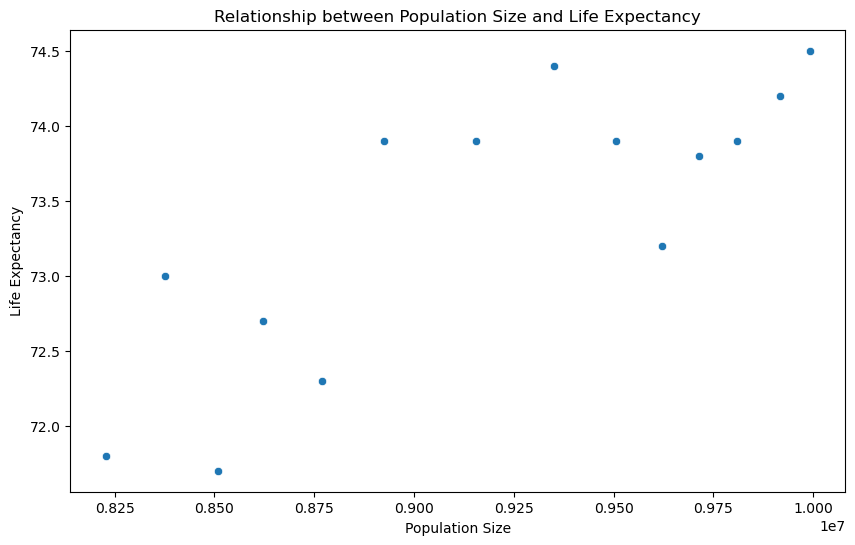

Correlation between population size and life expectancy: 0.81


In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load life expectancy data
life_url = 'Life Expectancy Data.csv'  # Path to your actual data
life_df = pd.read_csv(life_url)

# Trim down the columns to only those needed for the analysis
life_df = life_df[['Country', 'Year', 'Life expectancy ']]

# Standardize state names in the population data to match life expectancy data
final['Country'] = final['state'].apply(lambda x: x.strip())

# Filter population data to include only 'total' ages and reset the index
population_df = final.query("ages == 'total'").copy()
population_df.reset_index(inplace=True)

# Inspect the population data to check the column names
print("Population DataFrame Columns:\n", population_df.columns)
print("Population DataFrame Sample:\n", population_df.head())

# Merge life expectancy data with population data
merged_life_df = pd.merge(population_df, life_df, how='left', left_on=['Country', 'year'], right_on=['Country', 'Year'])

# Filter out rows where life expectancy is NaN
merged_life_df = merged_life_df.dropna(subset=['Life expectancy '])

# Keep only the relevant columns for the analysis
merged_life_df = merged_life_df[['Country', 'year', 'population', 'Life expectancy ']]

# Display the merged dataframe
print("Merged Life Expectancy DataFrame:\n", merged_life_df.head())

# Plot the relationship between population size and life expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population', y='Life expectancy ', data=merged_life_df)
plt.xlabel('Population Size')
plt.ylabel('Life Expectancy')
plt.title('Relationship between Population Size and Life Expectancy')
plt.show()

# Calculate the correlation between population size and life expectancy
correlation = merged_life_df['population'].corr(merged_life_df['Life expectancy '])
print(f"Correlation between population size and life expectancy: {correlation:.2f}")


In [ ]:
Interpretation of the Results
Strong Positive Correlation:

A correlation coefficient of 0.81 suggests a strong positive relationship between population size and life expectancy. This implies that regions with larger populations tend to have higher life expectancy.
Potential Factors:

While correlation does not imply causation, this positive relationship could be influenced by several factors. Larger populations may indicate better healthcare systems, higher economic development, more resources for public health, and better infrastructure, all of which can contribute to higher life expectancy.
Consideration of Outliers and Data Quality:

It’s important to consider the quality of the data and any potential outliers. Sometimes, a few influential points can affect the correlation. Additionally, ensure that the data spans a representative sample of regions and years for more accurate analysis.

In [105]:
import pandas as pd

# Example DataFrame with multiple years of data for each state
data = {
    'state': ['Alaska', 'Alaska', 'Alaska', 'California', 'California', 'California', 'Texas', 'Texas', 'Texas'],
    'year': [1990, 1991, 1992, 1990, 1991, 1992, 1990, 1991, 1992],
    'population': [553290, 570193, 580000, 29760021, 30282155, 31000000, 16986510, 17232586, 17500000],
    'life_expectancy': [75.1, 75.4, 75.6, 78.2, 78.5, 78.7, 76.8, 77.0, 77.2]
}

df = pd.DataFrame(data)
df.set_index(['state', 'year'], inplace=True)
print("Original DataFrame:\n", df)


Original DataFrame:
                  population  life_expectancy
state      year                             
Alaska     1990      553290             75.1
           1991      570193             75.4
           1992      580000             75.6
California 1990    29760021             78.2
           1991    30282155             78.5
           1992    31000000             78.7
Texas      1990    16986510             76.8
           1991    17232586             77.0
           1992    17500000             77.2


In [108]:
import pandas as pd

# Example DataFrame with multiple years of data for each state
data = {
    'state': ['Alaska', 'Alaska', 'Alaska', 'California', 'California', 'California', 'Texas', 'Texas', 'Texas'],
    'year': [1990, 1991, 2000, 1990, 1991, 2000, 1990, 1991, 2000],
    'population': [553290, 570193, 622000, 29760021, 30282155, 33300000, 16986510, 17232586, 20000000],
    'life_expectancy': [75.1, 75.4, 76.0, 78.2, 78.5, 79.0, 76.8, 77.0, 78.0]
}

df = pd.DataFrame(data)
df.set_index(['state', 'year'], inplace=True)
print("Original DataFrame:\n", df)

# Filter rows to show data for the year 2000 using boolean indexing
df_2000 = df[df.index.get_level_values('year') == 2000]
print("\nFiltered DataFrame for the year 2000 using boolean indexing:\n", df_2000)


Original DataFrame:
                  population  life_expectancy
state      year                             
Alaska     1990      553290             75.1
           1991      570193             75.4
           2000      622000             76.0
California 1990    29760021             78.2
           1991    30282155             78.5
           2000    33300000             79.0
Texas      1990    16986510             76.8
           1991    17232586             77.0
           2000    20000000             78.0

Filtered DataFrame for the year 2000 using boolean indexing:
                  population  life_expectancy
state      year                             
Alaska     2000      622000             76.0
California 2000    33300000             79.0
Texas      2000    20000000             78.0


In [109]:
import pandas as pd

# Example DataFrame with multiple years of data for each state
data = {
    'state': ['Alaska', 'Alaska', 'Alaska', 'California', 'California', 'California', 'Texas', 'Texas', 'Texas'],
    'year': [1990, 1991, 2000, 1990, 1991, 2000, 1990, 1991, 2000],
    'population': [553290, 570193, 622000, 29760021, 30282155, 33300000, 16986510, 17232586, 20000000],
    'life_expectancy': [75.1, 75.4, 76.0, 78.2, 78.5, 79.0, 76.8, 77.0, 78.0]
}

df = pd.DataFrame(data)
print("Original DataFrame:\n", df)

# Filter rows to show data for the year 2000 using query
df_2000_query = df.query('year == 2000')
print("\nFiltered DataFrame for the year 2000 using query:\n", df_2000_query)


Original DataFrame:
         state  year  population  life_expectancy
0      Alaska  1990      553290             75.1
1      Alaska  1991      570193             75.4
2      Alaska  2000      622000             76.0
3  California  1990    29760021             78.2
4  California  1991    30282155             78.5
5  California  2000    33300000             79.0
6       Texas  1990    16986510             76.8
7       Texas  1991    17232586             77.0
8       Texas  2000    20000000             78.0

Filtered DataFrame for the year 2000 using query:
         state  year  population  life_expectancy
2      Alaska  2000      622000             76.0
5  California  2000    33300000             79.0
8       Texas  2000    20000000             78.0
